<a href="https://colab.research.google.com/github/JParraArias/SignalsAndSystems2024-2/blob/main/Parcial_2_Se%C3%B1ales%24Sistemas_2024_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Parcial # 2 (Fourier). Señales y sistemas 2024-2
## Juan Leandro Parra Arias
## 1002653993
## jparraar@unal.edu.co

#Punto 1

 1. Realice las simulaciones respectivas para graficar el espectro de Fourier del ejercicio 1 (magnitud y fase como diagrama de Bode en decibelios), y presente el error relativo y la senal reconstruida para N = {1, 2, . . . , 50}.

##Simulación

Este código en Python permite al usuario ingresar un valor para la amplitud A y la frecuencia Fo de una señal. Utiliza estos valores para simular y graficar una señal que es el cuadrado de la magnitud de una función coseno con frecuencia Fo y amplitud A. Primero, define el intervalo de tiempo para la simulación, calculando el tiempo inicial y final del intervalo basado en la frecuencia de la señal. Luego, establece una frecuencia de muestreo que es 30 veces la frecuencia de la señal para cumplir con el criterio de Nyquist y evitar el aliasing. A continuación, genera un vector de tiempo y calcula la señal deseada como |A cos(2πFo t)|^2. Finalmente, el código utiliza matplotlib para graficar la señal en función del tiempo, con etiquetas y una cuadrícula para facilitar la visualización.

Ingrese un valor de entero positivo para A: 1
Ingrese un valor de frecuencia positiva para Fo: 1
wo= 6.283185307179586
Fo= 1.0


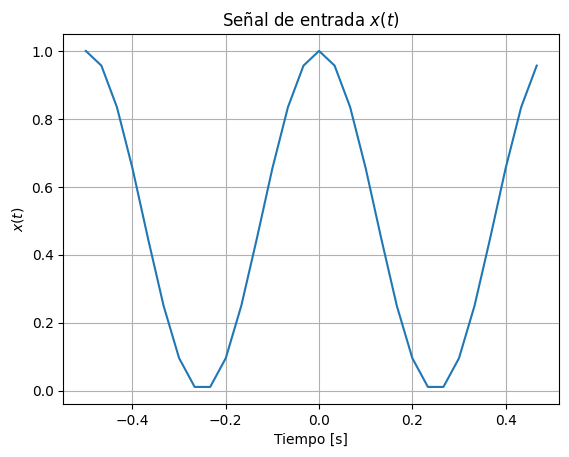

Fs= 30.0


In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Ingreso de la amplitud A y la frecuencia Fo
A = int(input("Ingrese un valor de entero positivo para A: "))
Fo = float(input("Ingrese un valor de frecuencia positiva para Fo: "))

# Simulación de la señal de entrada
ti = -1 / (2 * Fo)  # tiempo inicial
tf = 1 / (2 * Fo)   # tiempo final
T = tf - ti         # periodo total (duración del intervalo)
wo = 2 * np.pi / T  # frecuencia angular
print('wo=', wo)
print('Fo=', Fo)

Fs = 30 * Fo  # frecuencia de muestreo (respetar Nyquist, Fs >= 2Fo)
tv = np.arange(ti, tf, 1 / Fs)  # vector de tiempo
Nm = len(tv)  # número de muestras en el tiempo

# Señal de entrada |A cos(2πF_ot)|^2
xo = abs(A * np.cos(2 * np.pi * Fo * tv))**2  # señal |A cos(2πF_ot)|^2
plt.plot(tv, xo)  # gráfica de la señal
plt.xlabel('Tiempo [s]')
plt.ylabel('$x(t)$')
plt.title("Señal de entrada $x(t)$")
plt.grid()
plt.show()
print('Fs=', Fs)

El código construye las bases de Fourier que se utilizarán para representar y analizar la señal en términos de sus componentes de frecuencia.

## Solución
El espectro se puede graficar en términos de magnitud y fase, según:

$$|c_n| = \sqrt{c_n c_n^*}$$

$$\phi_n = \tan^{-1} \left( \frac{\text{Im}(c_n)}{\text{Re}(c_n)} \right)$$


In [138]:
#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 20 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [139]:
# graficar bases
from ipywidgets import interact,IntSlider

def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{(t)}")
    plt.xlabel("t[s]",fontsize = 12)
    plt.ylabel("$\sigma_n$(t)",fontsize = 12)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{ $\sigma_n$(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=20, min=-20), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

Este fragmento de código calcula el espectro de la señal $|A \ Cos(2 \pi F_o t)|^2$ utilizando la serie exponencial de Fourier. Primero, inicializa un vector de coeficientes de Fourier llamado `Cn`, que tiene una longitud de `2 * N + 1` y está compuesto por valores complejos. Este vector almacenará los coeficientes de los diferentes armónicos de la señal. A continuación, define un vector `nv` que abarca los números de los armónicos desde `-N` hasta `N`. Luego, asigna valores específicos a los coeficientes: el coeficiente del término DC (`C_0`) se establece en $ \frac{A^2}{2}$, y los coeficientes para los armónicos en -2 y +2 se establecen en $ \frac{A^2}{2}$. Este proceso permite representar la señal en el dominio de la frecuencia usando la serie de Fourier.

In [140]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
cn[N] =1 # Nivel de C_O
cn[N+2] = -A**2/2 #armónico +2
cn[N-2] = +A**2/2  #armónico -2


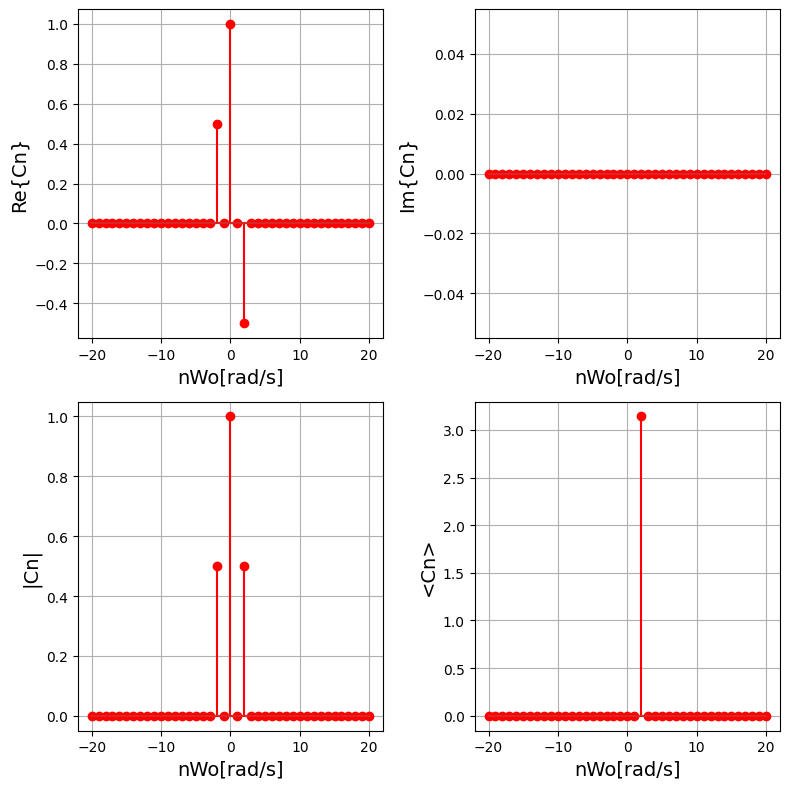

In [141]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'nWo[rad/s]',fontsize = 14)
plt.ylabel(r'Re{Cn}',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'nWo[rad/s]',fontsize = 14)
plt.ylabel(r'Im{Cn}',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'nWo[rad/s]',fontsize = 14)
plt.ylabel(r'|Cn|',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'nWo[rad/s]',fontsize = 14)
plt.ylabel(r'<Cn>',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()


In [142]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Definir constantes iniciales
a = 1.0  # Puedes ajustar el valor de "a" según sea necesario
Px = a**4 / 4 + a**2 / 8  # Potencia de la señal x(t)

# Definir parámetros de simulación
N = 50  # Número de coeficientes totales
T = 1.0  # Período de la señal

# Simulación del tiempo y la señal x(t)
tv = np.linspace(0, T, 1000)  # Vector de tiempo
x = (a * np.cos(2 * np.pi * tv))**2  # Señal original |A*cos(2πt)|^2

# Crear coeficientes de Fourier (cn) y funciones base (phin)
cn = np.zeros(2 * N + 1, dtype=np.complex_)  # Inicializar coeficientes cn
nv = np.arange(-N, N + 1)  # Índices de armónicos

# Calcular los coeficientes cn de forma analítica
cn[N] = a**2 / 2  # Coeficiente para n = 0 (DC)
cn[N + 2] = a**2 / 4  # Coeficiente para n = +2
cn[N - 2] = a**2 / 4  # Coeficiente para n = -2

# Generar las bases de Fourier
phin = np.array([np.exp(1j * 2 * np.pi * n * tv / T) for n in nv]).T

# Función para graficar la reconstrucción
def pltest(Na=1):
    # Índices de los coeficientes seleccionados
    ind = range(N - Na, N + Na + 1)

    # Error relativo acumulado
    er = 1 - np.sum(abs(cn[ind])**2) / Px

    # Reconstrucción de la señal usando las bases seleccionadas
    xe = np.real(np.sum(phin[:, ind] * cn[ind], axis=1))

    # Graficar señal original y reconstruida
    plt.figure(figsize=(10, 6))
    plt.plot(tv, x, color='r', label='Señal original', linewidth=2)
    plt.plot(tv, xe, color='b', linestyle='--', label='Señal reconstruida', linewidth=1.5)
    plt.title(f'E_r = {100 * er:.2f}% [Error relativo]', fontsize=16)
    plt.xlabel('t [s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

# Usar interact para explorar con diferentes valores de Na
interact(pltest, Na=(1, N, 1))


interactive(children=(IntSlider(value=1, description='Na', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

#Punto 2

Sea la señal portadora $c(t) = A_c\sin(2\pi F_c t),$ con $A_c,F_c\in\mathbb{R},$ y la señal mensaje $m(t)\in\mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t) = \left(1+\frac{m(t)}{A_c}\right)c(t)$. Luego, descargue desde YouTube, $5$ segundos de su canción favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la canción escogida). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la señal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada. Nota: se sugiere utilizar un canal de señal de audio para el desarrollo del ejercicio.

## Simulación

Este código está diseñado para descargar el audio de un video de YouTube en formato MP3 utilizando la biblioteca yt-dlp. Primero, se instalan las librerías necesarias: yt-dlp (desde su repositorio en GitHub) y soundfile (aunque esta última no se usa directamente en el código). Luego, se importan los módulos necesarios, como os para interactuar con el sistema operativo, y yt_dlp para manejar la descarga de los videos.

La función download_ytvid_as_mp3 toma como parámetros la URL del video y el nombre con el que se guardará el archivo de audio. Dentro de la función, se utiliza el método extract_info de yt_dlp para obtener los metadatos del video, sin descargarlo todavía. Posteriormente, se definen las opciones para la descarga, especificando que se descargue solo el mejor formato de audio disponible ('bestaudio/best') y que el archivo se guarde con el nombre proporcionado, en formato MP3.

Finalmente, dentro de un bloque with, se ejecuta la descarga usando yt_dlp, y una vez finalizada, se imprime un mensaje que confirma que la descarga se completó, mostrando el nombre del archivo generado.

In [143]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import os
import yt_dlp as youtube_dl

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2928467 sha256=23643b2a243238091811ead7e689f91be5ea5dcdde8cb29257864cb7316760d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-s4jnfwvx/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp
  Attempting uninstall: yt-dlp
    Found existing installation: yt-dlp 2025.1.26
    Uninstalling yt-dlp-2025.1.26:
      Successfully uninstalled yt-dlp-2025.1.26


Este código descarga un archivo de Google Drive usando wget, maneja el proceso de confirmación requerido por Google, y guarda el archivo como Canción.xlsx. Luego, se lista el contenido del directorio para verificar que la descarga fue exitosa.

In [144]:
#cargar datos desde drive acceso libre
FILEID = "1joam5FDKTHPnJ_jzSK5ZqzHhnVE8hTh7"

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  Canción.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

--2025-02-04 05:58:21--  https://docs.google.com/uc?export=download&confirm=&id=1joam5FDKTHPnJ_jzSK5ZqzHhnVE8hTh7
Resolving docs.google.com (docs.google.com)... 173.194.210.100, 173.194.210.139, 173.194.210.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.210.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1joam5FDKTHPnJ_jzSK5ZqzHhnVE8hTh7&export=download [following]
--2025-02-04 05:58:21--  https://drive.usercontent.google.com/download?id=1joam5FDKTHPnJ_jzSK5ZqzHhnVE8hTh7&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.26.132, 2607:f8b0:400c:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.26.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9649 (9.4K) [application/octet-stream]
Saving to: ‘Canción.xlsx’

Canción.xlsx        100%[===================>]   9.42K  --.-KB/

Este fragmento de código está diseñado para leer un archivo Excel llamado Canción.xlsx y cargar su contenido en un DataFrame de pandas, con el fin de trabajar con los datos de una manera estructurada

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'Canción.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)

Este código está diseñado para procesar una lista de videos de YouTube contenida en un archivo Excel. El proceso implica descargar el audio de los videos, convertirlos a formato WAV, y almacenar los resultados en una carpeta llamada results.

In [146]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion
n = 0
print(f"video {n+1} de {N}")
print(f"link: {X.loc[n,'link']}\n")
print(f"band: {X.loc[n,'band']}\n")
print(f"type: {X.loc[n,'type']}\n")
#ruta video n-th
name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
#descargar mp3 desde youtube
download_ytvid_as_mp3(X.loc[n,'link'],name_)
#convertir a .wav
subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                name_+'.wav'])

Carpeta results ya existe
video 1 de 1
link: https://youtu.be/ErBInUnEnns

band: Gildardo Montoya

type: Parrandera

[youtube] Extracting URL: https://youtu.be/ErBInUnEnns
[youtube] ErBInUnEnns: Downloading webpage
[youtube] ErBInUnEnns: Downloading tv client config
[youtube] ErBInUnEnns: Downloading player 0f7c1eff
[youtube] ErBInUnEnns: Downloading tv player API JSON
[youtube] ErBInUnEnns: Downloading ios player API JSON
[youtube] ErBInUnEnns: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=ErBInUnEnns
[youtube] ErBInUnEnns: Downloading webpage
[youtube] ErBInUnEnns: Downloading tv client config
[youtube] ErBInUnEnns: Downloading player 0f7c1eff
[youtube] ErBInUnEnns: Downloading tv player API JSON
[youtube] ErBInUnEnns: Downloading ios player API JSON
[youtube] ErBInUnEnns: Downloading m3u8 information
[info] ErBInUnEnns: Downloading 1 format(s): 251
[download] results/Gildardo Montoya_0_1.mp3 has already been downloaded
[download] 100% of    2

0

Este fragmento de código tiene como propósito listar todos los archivos con extensión .wav dentro de la carpeta results, y almacenarlos en una lista llamada wav_files.

In [147]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['Gildardo Montoya_0_1.wav']

El comando !pip install soundfile instala la biblioteca soundfile, que es una herramienta de Python para leer y escribir archivos de sonido. Es especialmente útil para trabajar con formatos de audio como .wav.

In [148]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio

# Assuming 'results/' contains your wav files
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]

# Check if there are any wav files in the directory
if not wav_files:
    print("No .wav files found in the 'results/' directory.")
else:
    # Use the first wav file as an example
    nombre_out = path + wav_files[0]

    try:
        xa, fs = sf.read(nombre_out)
        # read speech signal from file
        print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))
    except Exception as e:
        print(f"Error reading file {nombre_out}: {e}")

Frecuencia de muestreo 48000.00[Hz]
audio results/Gildardo Montoya_0_1.wav


In [149]:

xpro = xa.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [150]:
#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

<ipython-input-151-bfc7dba2389f>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


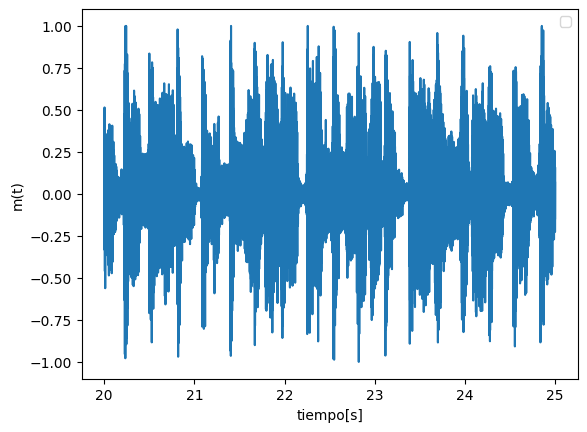

In [151]:

#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('m(t)')
plt.legend()
plt.show()


En este fragmento de código, se selecciona el primer canal de un segmento de audio almacenado en el arreglo x_t para posteriormente utilizarlo en una modulación.

In [152]:
#tomamos canal 1 para generar la modulación
xm = x_t[0,:,0]
xm.shape

(240000,)

Este código configura y calcula la señal de portadora para la modulación de amplitud. Define la frecuencia de la portadora, el vector de tiempo, y utiliza el índice de modulación para determinar la amplitud adecuada de la portadora. La señal de la portadora generada es una onda sinusoidal con la frecuencia y amplitud especificadas. Esta portadora se puede utilizar para modulación de la señal de audio en el proceso de modulación de amplitud.

In [153]:
Fc = 15000  # Frecuencia de la portadora
t = np.arange(0, ts, 1 / fs)  # Vector de tiempo
Im = float(input("Ingrese el índice de modulación: "))  # Índice de modulación

Ac = max(abs(xm)) / Im  # Amplitud de la portadora según el índice de modulación
c = Ac * np.sin(2 * np.pi * Fc * t)  # Señal portadora

print(Ac)


Ingrese el índice de modulación: 1
1.0


Este fragmento de código utiliza la biblioteca matplotlib para trazar gráficos de la señal de la portadora y la señal del mensaje (audio).

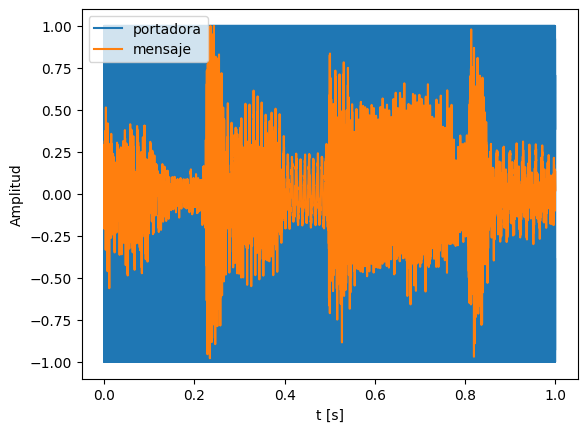

In [154]:
xm = xm[:len(t)]  # Recorta xm para que tenga la misma longitud que t
plt.plot(t, c, label='portadora')
plt.plot(t, xm, label='mensaje')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()


Este fragmento del código reproducirá la señal de la portadora generada, permitiendo escuchar cómo suena.

In [155]:
Audio(c,rate=fs) #reproducir portadora

Ingrese el índice de modulación (puede ser entero o decimal): 1


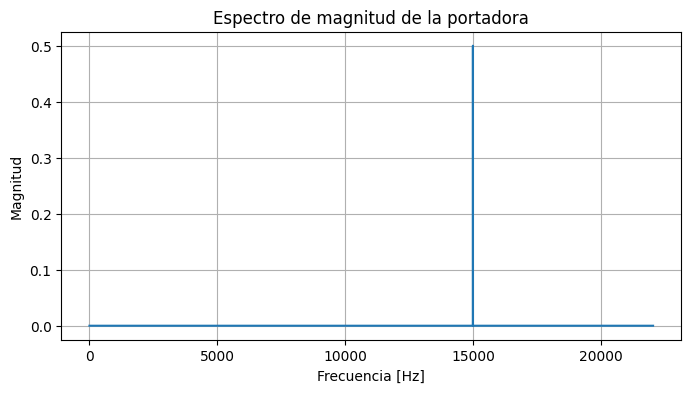

Amplitud de la portadora (Ac): 1.0


In [156]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
Fc = 15000  # Frecuencia de la portadora
fs = 44100  # Frecuencia de muestreo
ts = 1.0    # Duración de la señal en segundos
t = np.arange(0, ts, 1 / fs)  # Vector de tiempo
Im = float(input("Ingrese el índice de modulación (puede ser entero o decimal): "))  # Índice de modulación

# Señal portadora
xm = np.sin(2 * np.pi * 5 * t)  # Señal mensaje (puedes reemplazarla por tu señal real)
Ac = max(abs(xm)) / Im  # Amplitud de la portadora según el índice de modulación
c = Ac * np.sin(2 * np.pi * Fc * t)  # Portadora

# Transformada de Fourier
C = np.fft.fft(c)  # Transformada rápida de Fourier
frequencies = np.fft.fftfreq(len(c), 1 / fs)  # Vector de frecuencias
C_magnitude = np.abs(C) / len(c)  # Magnitud normalizada
C_phase = np.angle(C)  # Fase

# Tomar solo las frecuencias positivas
positive_freqs = frequencies[:len(frequencies) // 2]
positive_magnitude = C_magnitude[:len(C_magnitude) // 2]

# Graficar el espectro de magnitud
plt.figure(figsize=(8, 4))
plt.plot(positive_freqs, positive_magnitude)
plt.title("Espectro de magnitud de la portadora")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid()
plt.show()

# Mostrar la amplitud de la portadora
print(f"Amplitud de la portadora (Ac): {Ac}")


Este fragmento de código genera y muestra la señal modulada en amplitud (AM) usando la señal del mensaje (xm) y la señal de la portadora (c).

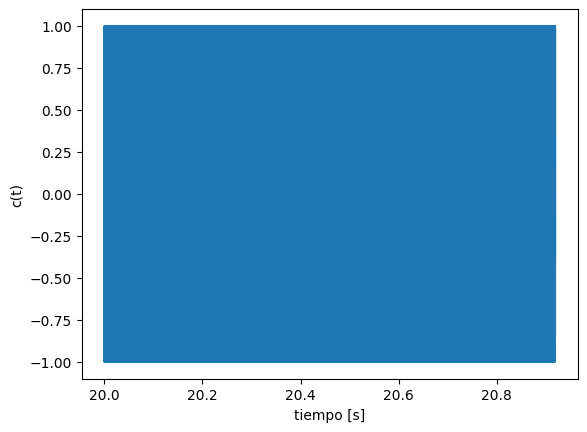

In [159]:
# Recortar tt para que coincida con la longitud de c
tt = tt[:len(c)]  # Ajustamos tt al tamaño de c

# Señal portadora en tiempo y frecuencia
plt.plot(tt, c)
plt.xlabel('tiempo [s]')
plt.ylabel('c(t)')
plt.show()

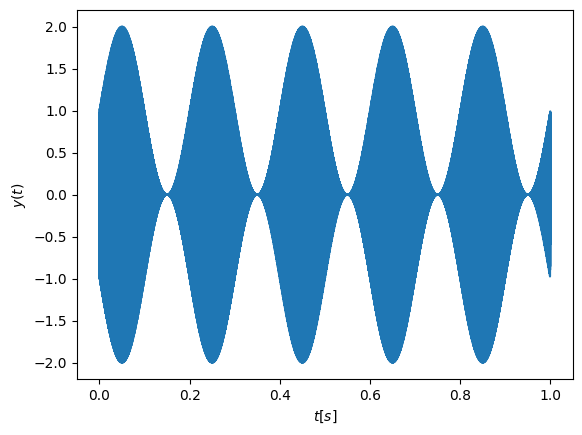

In [160]:
y = (1+xm/Ac)*c #señal modulada en AM
plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

Este fragmento de código reproducirá la señal modulada en amplitud (y), permitiendo escuchar cómo la información del mensaje ha sido incorporada en la señal portadora a través de la modulación.

In [161]:
Audio(y,rate=fs) #reproducir modulada

Finalmente este código calcula la RFFT de la señal de la portadora, la señal del mensaje, y la señal modulada para obtener sus representaciones en el dominio de la frecuencia. Luego, grafica estas representaciones para visualizar cómo se distribuyen las frecuencias en cada señal. La gráfica resultante permite observar las diferencias en los espectros de frecuencia de cada señal, ayudando a analizar la modulación en amplitud y cómo afecta al contenido en frecuencia de la señal original.

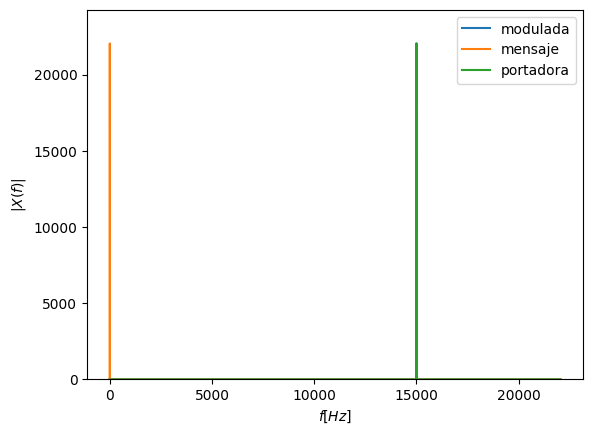

In [162]:
#calculo de espectros
Xfc = np.fft.rfft(c)
Xfm = np.fft.rfft(xm)
Xfy = np.fft.rfft(y)

vfre = np.fft.rfftfreq(len(c),1/fs)

plt.plot(vfre,abs(Xfy),label='modulada')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

#Punto 3

Consulte en que consiste la distorsión total de armónicos (Total Harmonic Distortion-(THD)) y el factor de potencia en un circuito electrico. Como puede calcularse el THD desde la FFT?. Como puede calcularse la distorsión del factor de potencia con base al THD?. Genere un ejemplo ilustrativo para el calculo del THD y la distorsión del factor de potencia para un rectificador de onda completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias para las simulaciones. El usuario podra escoger diferentes valores de R y C.

**Distorsión Total de Armónicos:** La Distorsión Total de Armónicos (THD, por sus siglas en inglés: Total Harmonic Distortion) es una medida de la distorsión que afecta a una señal debido a la presencia de armónicas. Las armónicas son componentes de frecuencia múltiplos enteros de la frecuencia fundamental de una señal. En un sistema eléctrico ideal, las señales de voltaje y corriente son senoidales (es decir, tienen solo una frecuencia fundamental). Sin embargo, debido a la no linealidad de algunos equipos, como rectificadores, motores o dispositivos electrónicos, se generan armónicas que distorsionan la forma de onda original.

El THD se calcula como la relación entre la potencia de las armónicas y la potencia de la frecuencia fundamental. De manera más formal, el THD es:

$$THD = \frac{\sqrt{A_2^2 + A_3^2 + A_4^2 + \dots}}{A_1}$$

Donde:

- $A_1$ es la amplitud de la frecuencia fundamental (la frecuencia más baja).
- $A_n$ son las amplitudes de las armónicas (componentes de frecuencias múltiplos de la frecuencia fundamental).

El THD se expresa como un porcentaje, y cuanto mayor es el THD, mayor es la distorsión de la señal. Un THD bajo indica que la señal es muy parecida a una onda sinusoidal ideal, mientras que un THD alto sugiere una mayor distorsión, lo que puede llevar a una mayor generación de calor y pérdidas de eficiencia en equipos eléctricos.

-------------------------------

**Factor de Potencia (FP):** El factor de potencia es una medida de la eficiencia con la que un circuito eléctrico utiliza la energía suministrada. En términos sencillos, es la relación entre la potencia activa (o real) $P$ y la potencia aparente $S$, y se expresa como:

$$FP = \frac{P}{S} = \cos(\theta)$$

Donde:

- **P** es la potencia activa (en vatios), que es la energía que realiza trabajo útil en el circuito (por ejemplo, mueve un motor o ilumina una lámpara).
- **S** es la potencia aparente (en voltamperios), que es la potencia total suministrada al circuito, que incluye tanto la potencia activa como la potencia reactiva (debida a componentes inductivos y capacitivos).
- **θ** es el ángulo de desfase entre la corriente y el voltaje.

El factor de potencia tiene un valor entre 0 y 1, y es más cercano a 1 cuando la corriente y el voltaje están alineados en fase (como en una carga resistiva pura). Un factor de potencia bajo indica una mayor presencia de potencia reactiva, lo que significa que parte de la energía no se está utilizando de manera efectiva.

---------------------

Para calcular el THD desde la FFT, se realiza el siguiente proceso:

1. Aplicar la FFT a la señal para obtener las amplitudes de las frecuencias presentes.
2. Identificar la frecuencia fundamental $A_1$ y las armónicas $A_2$, $A_3$, $A_4$, ....

----------------------

El THD (Distorsión Total de Armónicos) puede afectar el factor de potencia en un circuito eléctrico, ya que las armónicas introducen un desfase adicional entre la corriente y el voltaje. Un mayor THD generalmente indica una mayor distorsión, lo que reduce el factor de potencia.

Relación entre THD y el factor de potencia:
El factor de potencia distorsionado (FP
distorsionado) se puede calcular aproximando la fórmula:

$$FP_{distorsionado} \approx \frac{FP_{ideal}}{\sqrt{1 + THD^2}}$$

Donde:

- FP ideal es el factor de potencia sin armónicas (idealmente 1).
-THD es la distorsión total de armónicos en la señal (como un valor decimal).

## Simulación

### Rectificador de onda completa resistiva

En este código se importan las bibliotecas necesarias para simulaciones y análisis de datos. numpy se usa para manejar arrays y cálculos matemáticos. scipy proporciona funciones para el análisis de señales y optimización. matplotlib.pyplot se utiliza para crear gráficos. La línea %matplotlib inline es para mostrar gráficos directamente en Colab, mientras que sympy se usa para matemáticas simbólicas y su función init_session() inicia una sesión interactiva.

In [164]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

En este código, se utilizan la biblioteca sympy para definir y manipular expresiones simbólicas. Primero, se define s como un símbolo complejo y t, R, L, y C como símbolos positivos. Luego, se define X como una función simbólica que depende de s. Finalmente, se calcula Y como la función X(s) dividida por el símbolo R. Esta expresión representa una relación simbólica en la que Y es inversamente proporcional a R y está relacionada con la función X(s).

In [165]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(R) * X
Y

X(s)/R

Primero, se define R_v como 1000, que representa un valor de resistencia para la simulación. Luego, se sustituye el valor de R en la expresión simbólica Y con R_v usando el método subs. Esto produce Y_R, que es la versión de la expresión Y con R reemplazado por 1000. Finalmente, Y_R contiene el resultado de esta sustitución.

In [166]:
R_v = 1000 #valores de simulacion de R
Y_R = Y.subs(R, R_v)
Y_R

X(s)/1000

Primero, se define en este código num como un array de numpy con el valor [1], que representa los coeficientes del numerador de una función de transferencia. Luego, se define den como otro array de numpy con los coeficientes [R_v, 1], que representa los coeficientes del denominador de la misma función de transferencia. A continuación, se crea un objeto TransferFunction de scipy.signal utilizando num y den para representar la función de transferencia. Finalmente, se imprimen los arrays num y den para mostrar los coeficientes usados en la función de transferencia.

In [167]:
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R_v,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[1000    1]


En este fragmento de código se define una frecuencia de alimentación Fo de 60 Hz y una frecuencia de muestreo Fs de 1800 Hz. Se generan los tiempos t para simular 5 períodos de la señal de alimentación. La señal de entrada in_o es una onda senoidal y rec_c es una señal de tren de pulsos que simula una rectificación completa. La señal rectificada se obtiene multiplicando in_o por rec_c. Finalmente, se calcula la salida out de la función de transferencia G_n para esta señal rectificada utilizando scipy.signal.

In [168]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada
#Para rectificador de media onda:
rec_m = 0.5*(sig.square(2*np.pi*Fo*t)+1)
in_ = in_o * rec_c #si se quiere probar con rec media onda multiplicar por rec_m
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

Se utiliza matplotlib para graficar la señal de alimentación in_o en función del tiempo t. La función plt.plot dibuja la gráfica, y plt.legend añade una leyenda que identifica la señal como "Alimentación". Finalmente, plt.show muestra la gráfica.

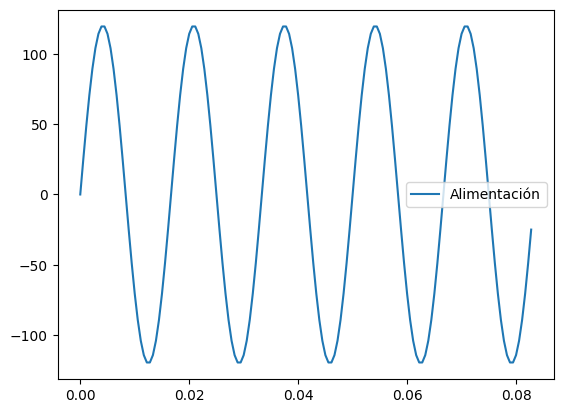

In [169]:
#señales de alimentación y tren de pulsos
plt.plot(t,in_o,label='Alimentación')
plt.legend()
plt.show()

Se utiliza matplotlib para graficar la señal del tren de pulsos rec_c en función del tiempo t. La función plt.plot dibuja la gráfica, y plt.legend añade una leyenda que identifica la señal como "Tren Pulsos". Finalmente, plt.show muestra la gráfica.

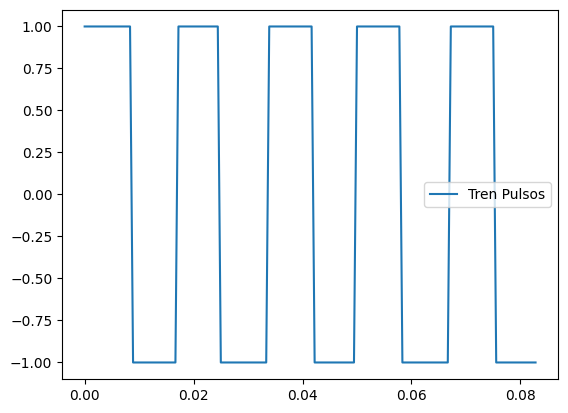

In [170]:
plt.plot(t,rec_c,label='Tren Pulsos')
plt.legend()
plt.show()

Se utilizan las funciones de matplotlib para graficar dos señales: la entrada rectificada in_ y la salida del circuito out. La función plt.plot se usa para dibujar ambas señales en función del tiempo t, con etiquetas correspondientes "In(t)" y "Out(t)". Se añaden etiquetas a los ejes con plt.xlabel y plt.ylabel, y plt.show muestra la gráfica.

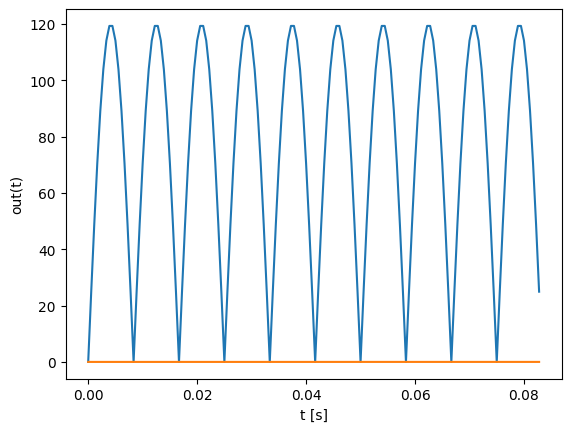

In [171]:
plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

Se calcula el vector de frecuencias vfre usando np.fft.rfftfreq para la Transformada Rápida de Fourier (FFT) con base en el tamaño del vector out y el tiempo de muestreo 1/Fs. Luego, se calcula la FFT de out utilizando np.fft.rfft. Finalmente, se grafica el espectro de frecuencias utilizando plt.stem, mostrando la magnitud de la FFT en función de la frecuencia vfre. Las etiquetas de los ejes se añaden con plt.xlabel y plt.ylabel, y plt.show muestra la gráfica.

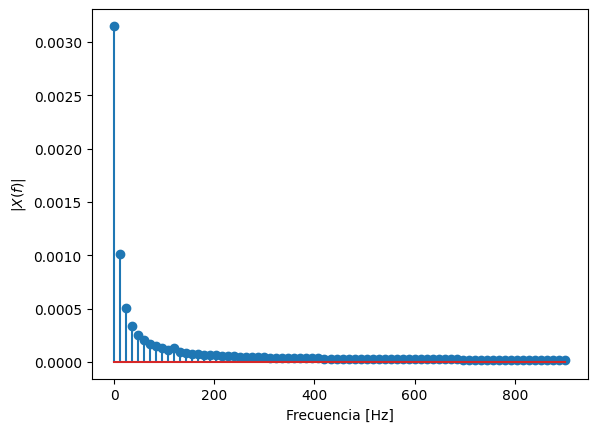

In [172]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

plt.stem(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

Finalmente en este código se realiza una simulación y análisis de un circuito rectificador con el objetivo de calcular dos métricas clave: el Total Harmonic Distortion (THD) y la distorsión del factor de potencia. Primero, simula la respuesta de un circuito con una función de transferencia dada, utilizando una señal de entrada senoidal rectificada. Luego, evalúa la salida del circuito y analiza el contenido en frecuencia mediante la Transformada Rápida de Fourier (FFT). El THD se calcula para medir la cantidad de distorsión armónica en la señal de salida, comparando la potencia de los armónicos con la potencia de la componente fundamental. Además, se calcula la distorsión del factor de potencia, que indica la desviación del factor de potencia ideal debido a la presencia de componentes no lineales en el circuito. Estos análisis proporcionan una visión integral de la calidad de la señal y la eficiencia del sistema rectificador.

In [173]:
# Cálculo del THD (Total Harmonic Distortion)
# El THD se calcula como la relación entre la suma de las potencias de los armónicos y la potencia de la fundamental
fundamental_freq = Fo
harmonics = [2 * fundamental_freq, 3 * fundamental_freq, 4 * fundamental_freq]
fundamental_idx = np.argmin(np.abs(vfre - fundamental_freq))

# Potencia de la componente fundamental
fundamental_power = np.abs(Xf[fundamental_idx])**2

# Potencia de los armónicos
harmonic_powers = [np.abs(Xf[np.argmin(np.abs(vfre - h))])**2 for h in harmonics]
total_harmonic_power = sum(harmonic_powers)

# THD en porcentaje
THD = np.sqrt(total_harmonic_power) / np.sqrt(fundamental_power) * 100

print(f"THD: {THD:.2f}%")

# Cálculo del factor de potencia
# La distorsión del factor de potencia puede ser calculada a partir de la componente fundamental y su relación con el total
V1 = np.sqrt(fundamental_power)  # Tensión de la componente fundamental
Vt = np.sqrt(np.sum(np.abs(Xf)**2))  # Tensión total
PF = V1 / Vt  # Factor de potencia
Distortion = 1 - PF  # Distorsión del factor de potencia

print(f"Distorsión del factor de potencia: {Distortion:.2f}")

THD: 79.54%
Distorsión del factor de potencia: 0.94


###Rectificador de onda completa RC

Este código proporciona una base para la simulación y el análisis de señales en Python, importando las bibliotecas necesarias para realizar cálculos numéricos, visualizaciones gráficas, procesamiento de señales, optimización y matemáticas simbólicas.

In [174]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

El código configura una representación simbólica para un sistema en el dominio de Laplace. Define variables simbólicas para el tiempo y los parámetros del circuito, así como una función simbólica de entrada. Luego, define una función de transferencia Y para un filtro pasa-bajo RC, que es un componente común en circuitos electrónicos para atenuar señales de alta frecuencia. La función de transferencia Y muestra cómo la entrada X se transforma en la salida en el dominio de Laplace.

In [175]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(R*C*s + 1) * X
Y

X(s)/(C*R*s + 1)

En este fragmento de código se realiza la sustitución de los valores específicos para los parámetros de resistencia y capacitancia en la función de transferencia simbólica Y. Esto permite obtener una expresión concreta para la función de transferencia del circuito RC con los valores de resistencia y capacitancia proporcionados. La función de transferencia Y_RC resultante se puede usar para análisis adicionales, como simular la respuesta del sistema o realizar cálculos numéricos en el dominio de Laplace con estos parámetros específicos.

In [176]:
R_v = 1000 #valores de simulacion de R
C_v =  10e-6 # valores de simulacion de C
Y_RC = Y.subs(R, R_v).subs(C, C_v)
Y_RC

X(s)/(0.01*s + 1)

En este código define la función de transferencia de un sistema utilizando los coeficientes del numerador y del denominador en el formato requerido por SciPy. Se crea un objeto TransferFunction que representa el sistema RC con los valores de resistencia y capacitancia proporcionados. La impresión de los coeficientes permite verificar los valores antes de utilizar la función de transferencia para simulaciones o análisis adicionales.

In [177]:
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R_v*C_v,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[0.01 1.  ]


El código simula la respuesta de un sistema RC a una señal de entrada senoidal rectificada. Primero, define la señal de entrada y las funciones de rectificación para simular tanto la rectificación completa como la de media onda. Luego, evalúa la salida del sistema RC utilizando la función de transferencia definida anteriormente (G_n) y la señal de entrada rectificada. Esta simulación permite analizar cómo el sistema RC responde a diferentes formas de señal de entrada y ver el efecto de la rectificación en la salida del sistema.

In [178]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada
#Para rectificador de media onda:
rec_m = 0.5*(sig.square(2*np.pi*Fo*t)+1)
in_ = in_o * rec_c #si se quiere probar con rec media onda multiplicar por rec_m
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

El código genera un gráfico que visualiza la señal de alimentación (in_o) a lo largo del tiempo (t). Este gráfico es útil para observar la forma de onda de la señal senoidal con una frecuencia de 60 Hz y una amplitud de 120. La leyenda ayuda a identificar qué serie de datos se está mostrando en el gráfico.

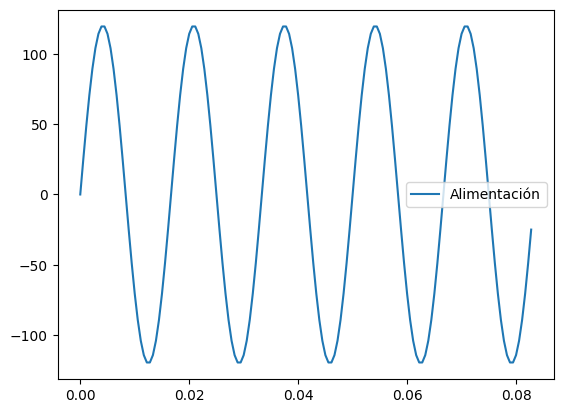

In [179]:
#señales de alimentación y tren de pulsos
plt.plot(t,in_o,label='Alimentación')
plt.legend()
plt.show()

El código genera un gráfico que muestra el tren de pulsos (rec_c) a lo largo del tiempo (t). El tren de pulsos es una señal cuadrada que simula la rectificación completa de una onda senoidal.

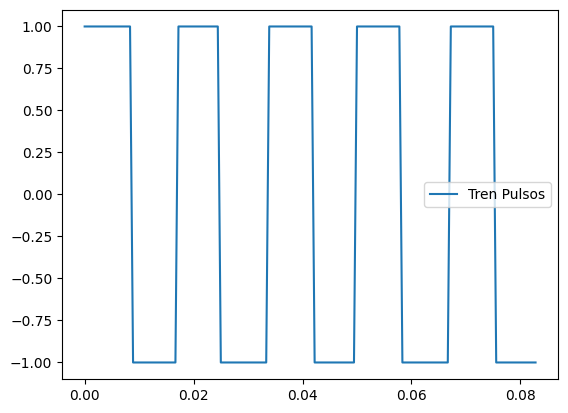

In [180]:
plt.plot(t,rec_c,label='Tren Pulsos')
plt.legend()
plt.show()

El código genera un gráfico que compara dos señales: la entrada rectificada (in_) y la salida del circuito (out). La visualización muestra cómo la señal de entrada rectificada es transformada por el circuito (definido por la función de transferencia) para producir la señal de salida. Las etiquetas en los ejes permiten interpretar las unidades de tiempo y el valor de la salida.

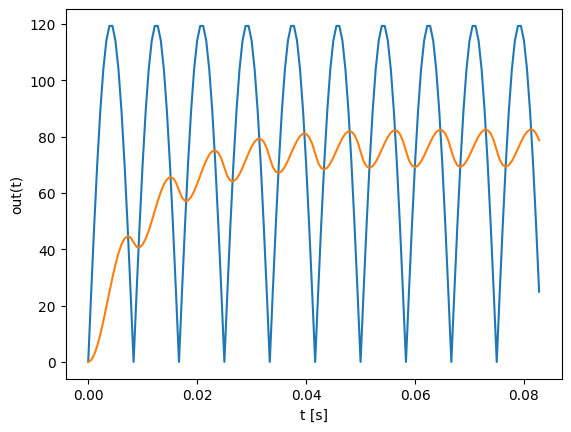

In [181]:
plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

El código calcula y visualiza la Transformada Rápida de Fourier (FFT) de la señal de salida out. La FFT convierte la señal en el dominio del tiempo a su representación en el dominio de la frecuencia, permitiendo analizar las componentes de frecuencia presentes en la señal. El gráfico resultante muestra la magnitud de cada componente de frecuencia, lo que es útil para identificar las frecuencias dominantes y evaluar la distribución espectral de la señal de salida del sistema.

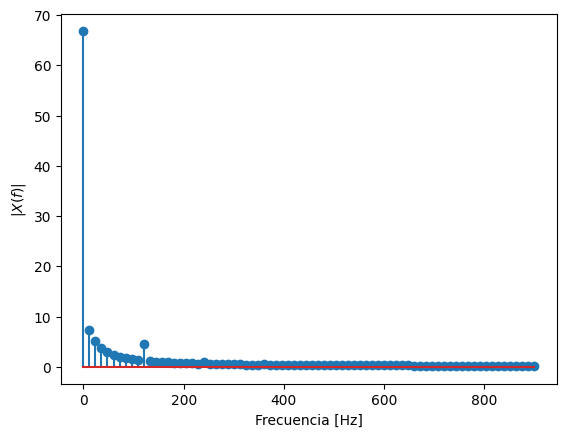

In [182]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

plt.stem(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

Finalmente este código simula la respuesta de un circuito RC ante una señal de entrada senoidal rectificada de onda completa, y luego calcula dos métricas clave: la distorsión armónica total (THD) y el factor de potencia (PF). Utiliza la Transformada de Fourier para analizar el contenido en frecuencia de la señal de salida y calcula el THD comparando las potencias de los armónicos (2ª, 3ª, 4ª) con la potencia de la componente fundamental. Además, calcula el factor de potencia, que mide la eficiencia energética del sistema al relacionar la tensión de la componente fundamental con la tensión total.

In [183]:
# Cálculo del THD (Total Harmonic Distortion)
# El THD se calcula como la relación entre la suma de las potencias de los armónicos y la potencia de la fundamental
fundamental_freq = Fo
harmonics = [2 * fundamental_freq, 3 * fundamental_freq, 4 * fundamental_freq]
fundamental_idx = np.argmin(np.abs(vfre - fundamental_freq))

# Potencia de la componente fundamental
fundamental_power = np.abs(Xf[fundamental_idx])**2

# Potencia de los armónicos
harmonic_powers = [np.abs(Xf[np.argmin(np.abs(vfre - h))])**2 for h in harmonics]
total_harmonic_power = sum(harmonic_powers)

# THD en porcentaje
THD = np.sqrt(total_harmonic_power) / np.sqrt(fundamental_power) * 100

print(f"THD: {THD:.2f}%")

# Cálculo del factor de potencia
# La distorsión del factor de potencia puede ser calculada a partir de la componente fundamental y su relación con el total
V1 = np.sqrt(fundamental_power)  # Tensión de la componente fundamental
Vt = np.sqrt(np.sum(np.abs(Xf)**2))  # Tensión total
PF = V1 / Vt  # Factor de potencia
Distortion = 1 - PF  # Distorsión del factor de potencia

print(f"Distorsión del factor de potencia: {Distortion:.2f}")

THD: 198.00%
Distorsión del factor de potencia: 0.96
